In [40]:
# Import libraries
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('diabetes.csv')

# Basic inspection
print(f"Shape: {df.shape}")
df.head()


Shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [41]:
# Replace 0s with NaN (excluding columns where 0 is valid)
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[zero_cols] = df[zero_cols].replace(0, np.nan)

# Show missing value count
print("Missing values before:\n", df.isnull().sum())

# Fill missing values with column medians
df.fillna(df.median(), inplace=True)

# Confirm no missing values
print("Missing values after:\n", df.isnull().sum())


Missing values before:
 Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64
Missing values after:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


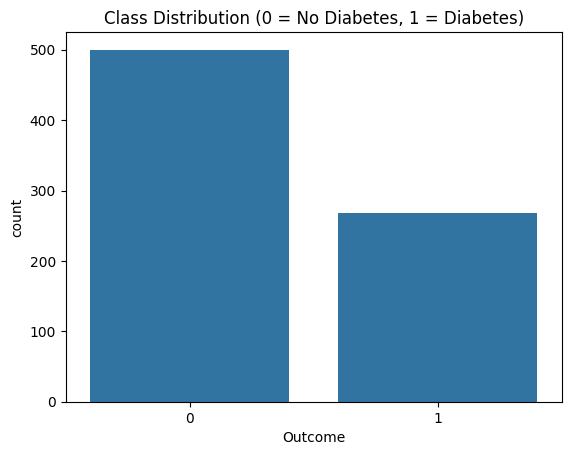

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Show class distribution
sns.countplot(x='Outcome', data=df)
plt.title("Class Distribution (0 = No Diabetes, 1 = Diabetes)")
plt.show()


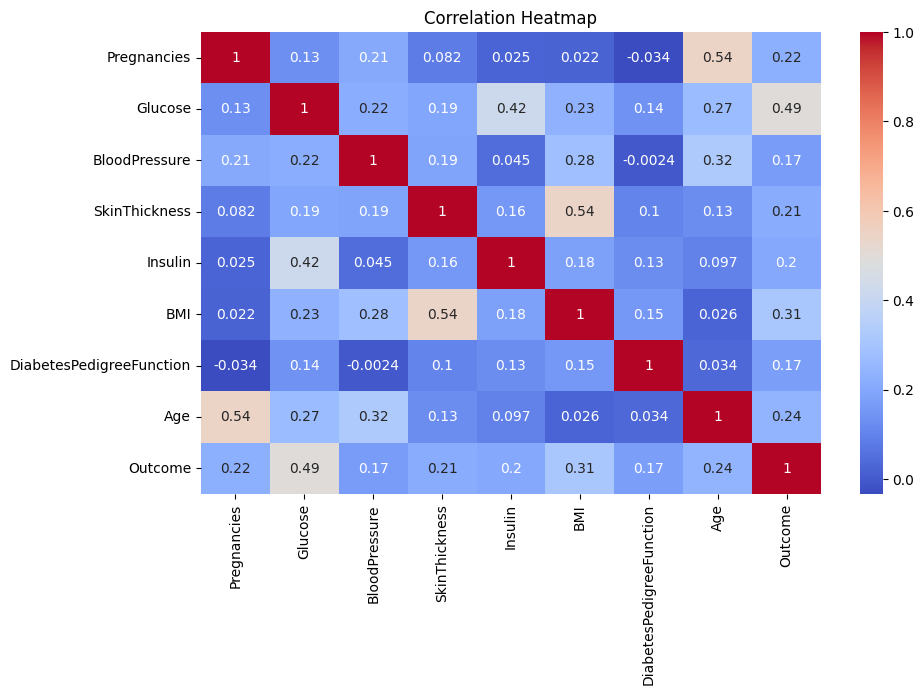

In [43]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Outcome', axis=1)
y = df['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [45]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:", Counter(y_train_bal))


Class distribution after SMOTE: Counter({0: 401, 1: 401})


=== Logistic Regression ===
Accuracy: 0.7077922077922078

LOGISTIC REGRESSION
Test Accuracy: 0.70779
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.71      0.76        99
           1       0.57      0.71      0.63        55

    accuracy                           0.71       154
   macro avg       0.69      0.71      0.70       154
weighted avg       0.73      0.71      0.71       154



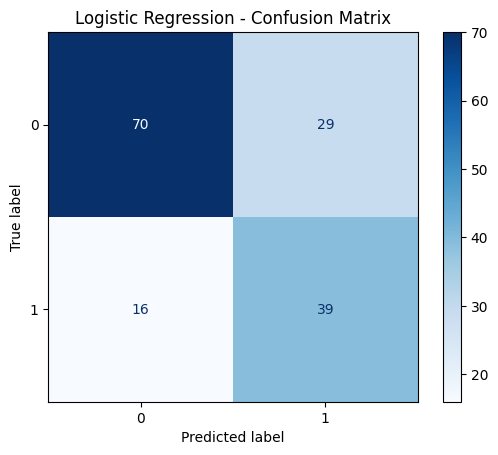

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_bal, y_train_bal)
y_pred_lr = lr.predict(X_test)
lr_acc = accuracy_score(y_test, y_pred_lr)

print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("""
LOGISTIC REGRESSION
Test Accuracy: {:.5f}
Classification Report:
{}""".format(lr_acc, classification_report(y_test, y_pred_lr)))




ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test, cmap='Blues')
plt.title('Logistic Regression - Confusion Matrix')
plt.show()


=== Random Forest ===
Accuracy: 0.7467532467532467

RANDOM FOREST
Test Accuracy: 0.74675
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.70      0.78        99
           1       0.61      0.84      0.70        55

    accuracy                           0.75       154
   macro avg       0.74      0.77      0.74       154
weighted avg       0.78      0.75      0.75       154



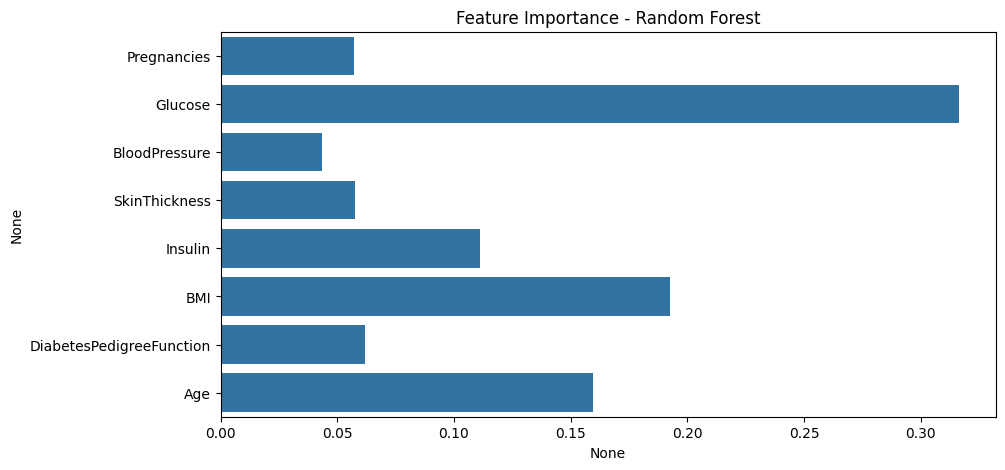

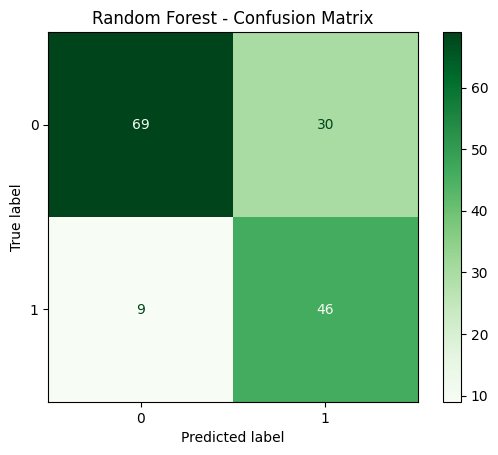

In [47]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train_bal, y_train_bal)
y_pred_rf = rf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)

print("=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("""
RANDOM FOREST
Test Accuracy: {:.5f}
Classification Report:
{}""".format(rf_acc, classification_report(y_test, y_pred_rf)))


# Feature importance plot
feature_importance = pd.Series(rf.feature_importances_, index=df.columns[:-1])
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title("Feature Importance - Random Forest")
plt.show()

ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap='Greens')
plt.title('Random Forest - Confusion Matrix')
plt.show()


=== SVM ===
Accuracy: 0.7337662337662337

SUPPORT VECTOR MACHINE
Test Accuracy: 0.73377
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.73      0.78        99
           1       0.60      0.75      0.67        55

    accuracy                           0.73       154
   macro avg       0.72      0.74      0.72       154
weighted avg       0.75      0.73      0.74       154



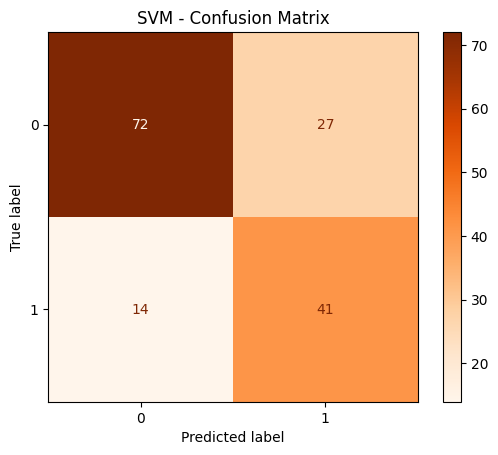

In [48]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1.0, gamma='scale')
svm.fit(X_train_bal, y_train_bal)
y_pred_svm = svm.predict(X_test)
svm_acc = accuracy_score(y_test, y_pred_svm)

print("=== SVM ===")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("""
SUPPORT VECTOR MACHINE
Test Accuracy: {:.5f}
Classification Report:
{}""".format(svm_acc, classification_report(y_test, y_pred_svm)))

ConfusionMatrixDisplay.from_estimator(svm, X_test, y_test, cmap='Oranges')
plt.title('SVM - Confusion Matrix')
plt.show()


C:\Users\User\anaconda3\envs\diabetes-ml\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
=== Neural Network ===
Accuracy: 0.7077922224998474

NEURAL NETWORK
Test Accuracy: 0.70779
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.72      0.76        99
           1       0.58      0.69      0.63        55

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.71      0.71       154



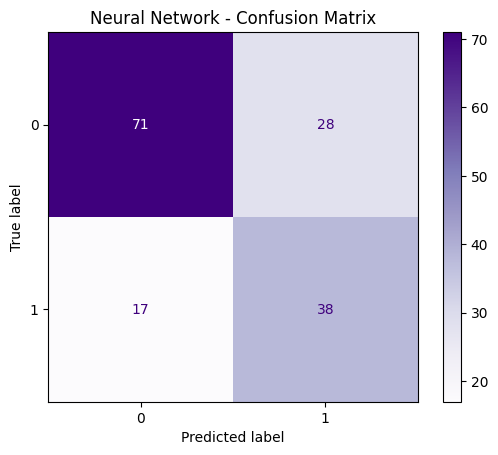

In [49]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Set random seed for reproducibility
tf.random.set_seed(42)

# Build model
model = Sequential([
    Dense(12, activation='relu', input_dim=X_train.shape[1]),  # Changed to input_dim
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam', 
             loss='binary_crossentropy', 
             metrics=['accuracy'])

# Train model
history = model.fit(X_train_bal, y_train_bal, 
                   epochs=100, 
                   batch_size=10, 
                   verbose=0)

# Evaluate model
loss, accuracy_nn = model.evaluate(X_test, y_test, verbose=0)
y_pred_nn = (model.predict(X_test) > 0.5).astype(int)

# Print results
print("=== Neural Network ===")
print("Accuracy:", accuracy_nn)
print("""
NEURAL NETWORK
Test Accuracy: {:.5f}
Classification Report:
{}""".format(accuracy_nn, classification_report(y_test, y_pred_nn)))

# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nn, cmap='Purples')
plt.title('Neural Network - Confusion Matrix')
plt.show()

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Collect all results
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'SVM', 'Neural Network'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_svm),
        accuracy_nn
    ],
    'Precision': [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_svm),
        precision_score(y_test, y_pred_nn)
    ],
    'Recall': [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_svm),
        recall_score(y_test, y_pred_nn)
    ],
    'F1 Score': [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_svm),
        f1_score(y_test, y_pred_nn)
    ]
})

results.set_index("Model", inplace=True)
print(results)


                     Accuracy  Precision    Recall  F1 Score
Model                                                       
Logistic Regression  0.707792   0.573529  0.709091  0.634146
Random Forest        0.746753   0.605263  0.836364  0.702290
SVM                  0.733766   0.602941  0.745455  0.666667
Neural Network       0.707792   0.575758  0.690909  0.628099


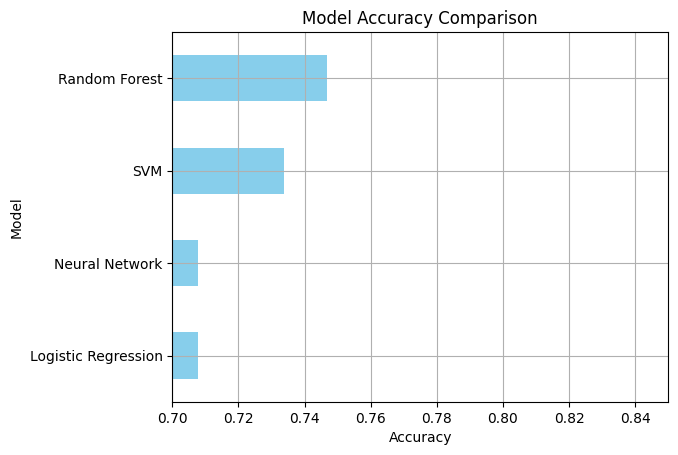

In [51]:
# Accuracy bar chart
results['Accuracy'].sort_values().plot(kind='barh', color='skyblue')
plt.title("Model Accuracy Comparison")
plt.xlabel("Accuracy")
plt.xlim(0.7, 0.85)
plt.grid(True)
plt.show()
